# Метрики качества классификации

###### Импорт необходимых библиотек

In [64]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

######  Импорт датасета

In [2]:
df = pd.read_csv('classification.csv')

In [4]:
# true - истинные значения классов
# pred - предсказанные значения классов
df

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
195,0,0
196,0,0
197,1,0
198,0,1


###### Таблица ошибок классификации 

In [110]:
# посчет количества ошибок
TP = 0
FP = 0
FN = 0
TN = 0
for _, row in df.iterrows():
    if row[0] == 1 and row[0] == row[1]:
        TP += 1
    elif row[0] == 0 and row[0] != row[1]:
        FP += 1
    elif row[0] == 1 and row[0] != row[1]:
        FN += 1
    else:
        TN += 1

In [111]:
# создание таблицы для визуализации результатов посчета
errors = pd.DataFrame(data=[[TP, FP], [FN, TN]], 
                      columns=['Actual Positive', 'Actual Negative'], 
                      index=['Predicted Positive', 'Predicted Negative'])
errors

,Actual Positive,Actual Negative
Predicted Positive,43,34
Predicted Negative,59,64


###### Оценка качества классификатора

In [112]:
print('Доля ошибок классификатора ("accuracy"):', round(accuracy_score(df['true'], df['pred']), 2))

Доля ошибок классификатора ("accuracy"): 0.54


In [113]:
print('Полнота классификатора ("recall"):', round(recall_score(df['true'], df['pred']), 2))

Полнота классификатора ("recall"): 0.42


In [114]:
print('Точность классификатора ("precision"):', round(precision_score(df['true'], df['pred']), 2))

Точность классификатора ("precision"): 0.56


In [115]:
print('Гармоническое среднее полноты и точности классификатора ("f - мера"):', 
      round(f1_score(df['true'], df['pred']), 2))

Гармоническое среднее полноты и точности классификатора ("f - мера"): 0.48


Таким образом, наиболее точно качество классификатора в данном случае описывается с помощью $F - меры$.

###### Оценка качества классификаторов, выделяющих степень принадлежности к классу 

In [46]:
df2 = pd.read_csv('scores.csv')
# true - истинные значения классов
# другие колонки - предсказанная степень принадлежности к классу 1 
df2

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263
...,...,...,...,...,...
195,0,0.573801,-0.088203,0.284192,0.400000
196,0,0.624422,-0.012315,0.205437,0.400000
197,1,0.425538,-0.135673,0.382351,0.700000
198,0,0.905270,0.583806,1.000000,1.000000


__Площади под ROC-кривой__

In [59]:
# рассчет показателей площади под ROC-кривой для каждого из классификаторов
roc_auc_scores = []
for row in df2:
    if row == 'true':
        continue
    else:
        roc_auc_scores.append((row, roc_auc_score(df2['true'], df2[row])))
roc_auc_scores

[('score_logreg', 0.719187675070028),
 ('score_svm', 0.7086834733893557),
 ('score_knn', 0.6351540616246498),
 ('score_tree', 0.6919267707082833)]

Наилучший показатель качества имеется у классификатора - логистической регрессии.

__Использование PR-RC-кривой для нахождения наиболее точного классификатора при полноте в $70\%$__

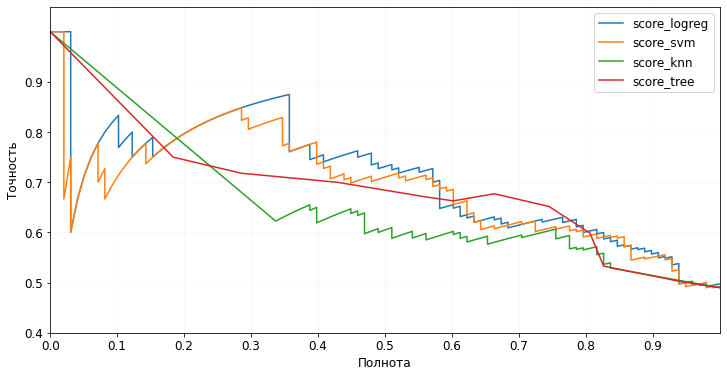

In [103]:
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(12,6))
precisions = []

# построение PR-RC-кривой и нахождение максимальной точности при полноте, больше или равной 0.7
for row in df2:
    if row == 'true':
        continue
    precision, recall, thresholds = precision_recall_curve(df2['true'], df2[row])
    indices = np.where(recall >= 0.7)[0]
    precisions.append((row, max(np.take(precision, indices))))
    plt.plot(recall, precision, label=row)

plt.xticks(np.arange(0, 1.0, 0.1))
plt.yticks(np.arange(0, 1.0, 0.1))
plt.ylim(0.4,1.05)
plt.xlim(0,1)
plt.grid(alpha=0.1)
plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [104]:
precisions

[('score_logreg', 0.6302521008403361),
 ('score_svm', 0.6228070175438597),
 ('score_knn', 0.6065573770491803),
 ('score_tree', 0.6517857142857143)]

Как видно из графика, а также по итоговым показателям точности при рассчете кривой, наилучшее значение точности показал классификатор - решающее дерево.